In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
heart_disease = pd.read_csv('/home/bakhtawar/Downloads/zero-to-mastery-ml-master/data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
#classifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
# fitting the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# evaluating the model
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [50]:
print (f" train set score:  {clf.score(X_train, y_train)}" )
print (f" test set score:  {clf.score(X_test, y_test)}" )

 train set score:  1.0
 test set score:  0.7868852459016393


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        29
           1       0.72      0.97      0.83        32

    accuracy                           0.79        61
   macro avg       0.83      0.78      0.78        61
weighted avg       0.83      0.79      0.78        61



In [25]:
print(confusion_matrix(y_test, y_preds))

[[18 11]
 [ 4 28]]


In [26]:
import pickle as pkl

pkl.dump(clf, open('rfm.pkl', "wb"))


In [27]:
ml = pkl.load(open("rfm.pkl", "rb"))
ml.score(X_test, y_test)

0.7540983606557377

## One Hot Encoding for sales data

In [28]:
car_sales_ext = pd.read_csv('/home/bakhtawar/Downloads/zero-to-mastery-ml-master/data/car-sales-extended.csv')
car_sales_ext.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
X = car_sales_ext.drop("Price", axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
y=car_sales_ext["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [31]:
#one hot encoding using sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# categories we want to convert to one hot encoding
categorical_features = ["Make", "Colour", "Doors"]

# applying one hot encoding using columntransformer.
#passthrough here means to passthrough categories/columns which are not in categorical_features.
transformer = ColumnTransformer([('one_hot', OneHotEncoder(), 
categorical_features)], remainder='passthrough' )

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_preds = clf.predict(X_test)
y_preds

array([11980.62, 11307.62, 49109.74, 23131.71, 29249.8 , 11833.24,
       11638.86, 16208.56, 13834.75,  8762.22, 28612.51, 17136.84,
       29430.4 , 10127.63, 18598.58, 15717.94, 11873.78, 13191.54,
       26231.07, 14252.52, 29249.8 ,  9876.29, 14991.7 , 11234.77,
       22902.12, 28719.76, 11154.72, 16398.74, 28765.07, 19651.09,
       17401.53, 12578.7 , 11401.2 , 17354.79, 12338.76,  8617.83,
       10244.67, 30861.39, 13254.76,  9750.21, 17267.52, 23039.71,
       24020.7 , 11487.21, 13519.94, 24436.07,  9976.91, 11656.77,
       24477.1 , 12137.94, 11866.05,  9069.52, 18875.15, 10620.03,
        8897.53, 21112.96,  6813.93,  9280.16,  8506.86, 20835.51,
       10682.64, 11146.14, 31296.82, 14915.92, 19896.97, 15920.3 ,
       11404.55, 23600.22, 15238.56, 12302.97, 10044.7 , 15888.36,
       14943.17, 16253.78,  9518.03, 12519.84, 18572.98, 10449.83,
       12522.05, 14313.87,  8939.03, 10494.97, 10510.64, 29353.22,
       25334.37, 18248.66,  5626.42, 11784.4 , 28749.04, 28000

In [34]:
clf.score(X_test, y_test)

0.3235867221569877

In [35]:
#another way todo one hot encoding is:
#this will only convert uncategorical data
dummies = pd.get_dummies(car_sales_ext[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [36]:
car_missing = pd.read_csv('/home/bakhtawar/Downloads/zero-to-mastery-ml-master/data/car-sales-extended-missing-data.csv')
car_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
#filling missing data
car_missing['Make'].fillna('missing make', inplace=True)
car_missing['Colour'].fillna('missing Color', inplace=True)
car_missing['Odometer (KM)'].fillna(car_missing['Odometer (KM)'].mean(), inplace=True)
car_missing['Doors'].fillna(4, inplace=True)

# check missing data after imputation
car_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
# drop all rows where lablel: price is missing
car_missing.dropna(inplace=True)
car_missing.isna().sum(), car_missing.shape

(Make             0
 Colour           0
 Odometer (KM)    0
 Doors            0
 Price            0
 dtype: int64,
 (950, 5))

In [40]:
X = car_missing.drop("Price", axis=1)
y = car_missing["Price"]

In [41]:
#one hot encoding using sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# categories we want to convert to one hot encoding
categorical_features = ["Make", "Colour", "Doors"]

# applying one hot encoding using columntransformer.
#passthrough here means to passthrough categories/columns which are not in categorical_features.
transformer = ColumnTransformer([('one_hot', OneHotEncoder(), 
categorical_features)], remainder='passthrough' )

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## filling missing values with scikit-learn


In [42]:
missingValues = pd.read_csv('/home/bakhtawar/ds/data/car-sales-extended-missing-data.csv')
missingValues.head(), missingValues.isna().sum()

(     Make Colour  Odometer (KM)  Doors    Price
 0   Honda  White        35431.0    4.0  15323.0
 1     BMW   Blue       192714.0    5.0  19943.0
 2   Honda  White        84714.0    4.0  28343.0
 3  Toyota  White       154365.0    4.0  13434.0
 4  Nissan   Blue       181577.0    3.0  14043.0,
 Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64)

In [43]:
#drop all missing values for the price or label
missingValues.dropna(subset=['Price'], inplace=True)
missingValues.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [44]:
X = missingValues.drop(columns=['Price'])
y = missingValues['Price']
X.shape, y.shape

((950, 4), (950,))

In [45]:
from sklearn.impute import SimpleImputer

categoricalImpute = SimpleImputer(strategy='constant', fill_value='missing')
doorImpute = SimpleImputer(strategy='constant', fill_value=4)
odometerImpute = SimpleImputer(strategy='mean')

imputer = ColumnTransformer([
    ('categoricalImpute', categoricalImpute, ['Make', 'Colour']),
    ('doorImputer', doorImpute, ['Doors']),
    ('odoImpute', odometerImpute, ['Odometer (KM)']),
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [46]:
filledValues = pd.DataFrame(filled_X, columns=['Make','Colour', 'Doors', 'Odometer (KM)'])
filledValues

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [47]:
# one-hot encoding
transformer = ColumnTransformer([
    ('make-Onehot', OneHotEncoder(), ['Make', 'Colour', 'Doors'])], remainder='passthrough'
)

transformed_X = transformer.fit_transform(filledValues)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [48]:
# training and evaluation

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

clf = RandomForestRegressor()
xTrain, xTest, yTrain, yTest = train_test_split(transformed_X, y, test_size=0.2)
clf.fit(xTrain, yTrain)
clf.score(xTest, yTest)

0.10486008486143839

## picking ML model for a machine learning model

In [3]:
from sklearn.datasets import fetch_california_housing

ch = fetch_california_housing()
ch

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

##### coefficient of determination determines how variableS relate to each other. so how close or different they are in comparison to one and other. 
so this ridge linearModel from sklearn will compare features Vs. Label and it will than give us the result.

### Ensemble Method is about combining predictions of several models.

In [4]:
chX = pd.DataFrame(ch['data'], columns=['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

chY = pd.DataFrame(ch['target'], columns=['MedHouseVal'])

chX.head(), chY.head(), chX.shape, chY.shape

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
    MedHouseVal
 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422,
 (20640, 8),
 (20640, 1))

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(chX, chY, test_size=0.2)

In [6]:
reg = RandomForestRegressor()
reg.fit(xTrain, yTrain.values.ravel())
reg.score(xTest, yTest)

0.803685489735848

In [7]:
reg.predict(xTest[:10])

array([0.96306  , 2.8345301, 2.44618  , 1.93799  , 1.93427  , 1.69621  ,
       0.72577  , 1.8998201, 1.45218  , 0.79742  ])

#### so we have 'predict()' vs. 'predict_proba()'
#### the difference is that one gives us predicted labels and other probabilites

0.0

,MedHouseVal
20629,1.08300
4777,1.83900
10869,2.05400
15662,5.00001
8999,2.47600
...,...
15798,2.50000
19956,1.08100
15345,1.03300
2208,1.07800


In [8]:
# using the above most dataset and computations i.e heart disease
# classification

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [9]:
y_preds = clf.predict_proba(X_test)
y_preds_true = y_preds[:,1:]
y_preds[:5], y_preds_true[:5]

(array([[0.99, 0.01],
        [0.09, 0.91],
        [0.53, 0.47],
        [0.  , 1.  ],
        [0.41, 0.59]]),
 array([[0.01],
        [0.91],
        [0.47],
        [1.  ],
        [0.59]]))

### cross validation score gives us different scores dending upon different chunks of train and test data splits.

In [10]:
# using the above most dataset and computations i.e heart disease
# classification

#using cross_validation_score method
from sklearn.model_selection import cross_val_score

clf.score(X_test, y_test), cross_val_score(clf, X, y), np.mean(cross_val_score(clf, X, y))

(0.8688524590163934,
 array([0.86885246, 0.8852459 , 0.80327869, 0.83333333, 0.78333333]),
 0.8314754098360655)

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_preds_true)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03030303, 0.03030303, 0.06060606,
       0.09090909, 0.09090909, 0.12121212, 0.12121212, 0.15151515,
       0.18181818, 0.21212121, 0.21212121, 0.27272727, 0.33333333,
       0.39393939, 0.42424242, 0.87878788, 0.96969697, 1.        ])

In [12]:
def roc_plot(fpr, tpr):

    plt.plot(fpr, tpr, color='green', label='R.O.C')

    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend(['green'], loc = 'lower right')
    plt.title('ROC Curve', color='blue')

    plt.show()
    

    

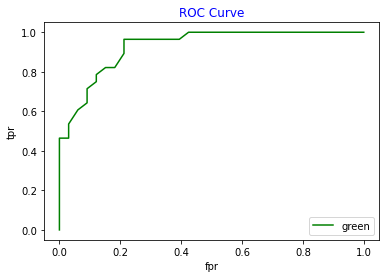

In [13]:
roc_plot(fpr, tpr)

#### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
yPreds = clf.predict(X_test)
confusion_matrix(y_test, yPreds)

array([[26,  7],
       [ 1, 27]])

In [16]:
pd.crosstab(y_test, yPreds, rownames=['actual'], colnames=['predicted'])

predicted,0,1
actual,,
0,26,7
1,1,27


In [17]:
import seaborn as sns

<AxesSubplot:>

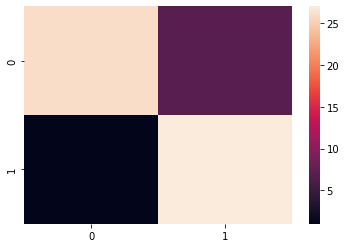

In [18]:
confMat = confusion_matrix(y_test, yPreds)
sns.heatmap(confMat )

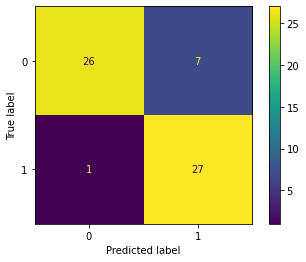

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, yPreds,)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yPreds,  ))

# precision indicates false positive
# recall indicates false negative
# F1-Score indicates both of them.
# Support indicates the number ofsamples each metric was calculaed on.
        

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



174    0
58     0
299    0
78     0
248   -1
Name: target, dtype: int64